In [1]:
import numpy as np
import os
from pydhamed import run_dhamed
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load transition counts

Load transition counts for the GLIC ion channel. 600 states were defined for this system and 153 umbrella windows were run [1,2]. Calculating a potential of mean force for the permeation of $\mathrm{Na^+}$ through the GLIC channel is not trivial.

In [2]:
transition_count_l = pd.read_pickle("transition_count_list", compression='bz2')

In [3]:
len(transition_count_l) # one transition count matrix for each of the 153 umbrella windows

153

In [4]:
transition_count_l[0].shape # each transition count matrix has shape 600x600  

(600, 600)

Each of the transition count matrices contains the transitions between each of the 600 microstates calculated from one umbrella window (i.e., simulation run). 

# Load bias potentials

In [5]:
bias_ar = np.load("bias.npy")

In [6]:
bias_ar.shape # For umbrella bias potential for each of the 600 states, for each of the 153 windows

(600, 153)

In [7]:
bias_ar[:,0].shape # First row is the bias acting on each of the 600 states in the first window

(600,)

# Solve DHAMed equations

In [8]:
og = run_dhamed(transition_count_l, bias_ar,
               jit_gradient=True)

7800
loglike-start 41446995.9842
41446995.9842
         Current function value: 41439703.523952
         Iterations: 610
         Function evaluations: 646
         Gradient evaluations: 635
time elapsed 27.8517827988 s


In [9]:
z = np.arange(-40,40, step=80.0/ 600)


Text(0.5,0,u'z [$\\mathrm{\\AA}$]')

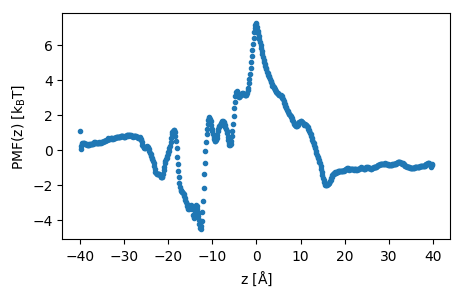

In [10]:
fig, ax = plt.subplots(figsize=(5,3))

pmf= (og*-1) - np.min((og*-1))
ax.plot(z, pmf - 4.5, ".")
ax.set_ylabel("PMF(z) [$\mathrm{k_BT}$]")
ax.set_xlabel("z [$\mathrm{\AA}$]")

The DHAMed calculation reproduces the expected shape of the PMF for ion channel permation with a maximum  >6 $\mathrm{k_BT}$ and a minimum <-4 $\mathrm{k_BT}$. 

# References 

[1] Zhu, F. Q.; Hummer, G. Pore opening and closing of a pentameric
ligand-gated ion channel Proc. Natl. Acad. Sci. U. S. A. 2010, 107, 19814–
19819 [10.1073/pnas.1009313107](http://www.pnas.org/content/107/46/19814.abstract)

[2] Zhu, F. Q.; Hummer, G. Theory and simulation of ion conduction in the
pentameric GLIC channel J. Chem. Theory Comput. 2012, 8, 3759– 3768 
[DOI:
10.1021/ct2009279](http://pubs.acs.org/doi/abs/10.1021/ct2009279)

[3] Zhu, F. Q.; Hummer, G. Convergence and error estimation in free energy calculations using the weighted histogram analysis method J. Comput. Chemistry 2012, 33, 453-465 
[DOI:10.1002/jcc.21989](http://onlinelibrary.wiley.com/doi/10.1002/jcc.21989/abstract;jsessionid=A356165C08BDF59F192004B7A4C34A92.f02t04?systemMessage=Wiley+Online+Library+usage+report+download+page+will+be+unavailable+on+Friday+24th+November+2017+at+21%3A00+EST+%2F+02.00+GMT+%2F+10%3A00+SGT+%28Saturday+25th+Nov+for+SGT+)